<div style="display: flex; align-items: center;">
    <img src="static/logo_rs.png" width="120" height="120">
    <h1> Progetto SMDA - User interest Recommendation System </h1>
</div>

<p>
    Questo sistema di raccomandazione è frutto delle conoscenze acquisite al corso di Social Media Data Analisys AA 2023-2024. Si pone come obiettivo quello di "Raccomandare" persone simili tra loro in base ai dati presi in esame.
</p>

<h2>Sommario</h2>
<ol>
    <li><a href="#teoria">Teoria</a>
    <li><a href="#introduzione">Introduzione al progetto</a>
    <li><a href="#analisi">Analisi dei dati</a>
    <li><a href="#sistema">Sistema di raccomandazione</a>
    <li><a href="#risultati">Risultati</a>
    <li><a href="#conclusione">Conclusione</a>
</ol>

<section id="teoria">
    <h1>1. Teoria</h1>
</section>

_**I sistemi di raccomandazione**_ sono una classe di sistemi che implicano la
predizione delle risposte dell'utente a delle opzioni, o in generale, le
preferenze di un utente rispetto a specifici oggetti (items) sulla base delle
preferenze espresse in passato. L'idea principale dietro i sistemi di
raccomandazione è la seguente:

- L'utente interagisce con gli oggetti;
- In base a tali oggetti, il sistema crea un modello di preferenze per l'utente;
- Il modello permette di predire la reazione dell'utente a nuovi oggetti;
- Il sistema cerca quali oggetti sono potenzialmente interessanti per l'utente;
- Il sistema raccomanda oggetti interessanti all'utente;

Esistono due principali gruppi di sistemi di raccomandazione:   

```Sistemi content-based```, che effettuano suggerimenti ad un utente sulla
base delle proprietà di altri item con cui l'utente ha interagito.      

```Sistemi collaborative filtering```, che effettuano suggerimenti ad un
utente sulla base degli item piaciuti ad utenti ad esso simili.

## Definizione del problema

Sia ``` X ``` l'insieme degli utenti  ed ```S``` l'insieme degli item. Lo scopo di un sistema di raccomandazione è quello di assegnare un valore ad una coppia ```utente-item (x, s) ∈ X x S```
che quantificherà quanto all'utente ```x``` possa piacere
l'item ``` s ```. Definiremo quindi una ```Utility Function``` (funzione di utilità) come
segue:  
$$u: X \times S \to \mathbb{R}$$



Dove ```R``` è l'insieme del rating, ovvero un insieme totalmente ordinato.
Esistono molte varianti di rating:

- rating compreso tra stelle ```0 - 5 stelle ```
- rating normalizzato compreso in ```[0,1]```
- rating binario ```{0,1}``` (mi piace, non mi piace)

Questa funzione determina uno score, rappresentante la preferenza dell'utente sull'oggetto in esame. L'obiettivo è predire questo score attraverso la coppia utente-item, permettendo di valutare l'utilità del prodotto per l'utente.
   


## Utility Matrix

Un sistema di raccomandazione si basa su un insieme di preferenze
conosciute espresse da utenti per oggetti o item, che può essere rappresentato
da una ```Matrice di Utilità``` ```M```(talvolta chiamata U ). La matrice ```M``` è una
matrice ```users-items``` dove l'i-esima riga rappresenta l'utente  $x_i$ , l'i-esima
colonna rappresenta l'item $s_i$
ed ogni elemento $r_{i,j}$ della matrice rappresenta
il rating dell'utente $x_i$ rispetto all'item $s_j$.    

Essa rappresenta la conoscenza esistente del sistema sulla relazione tra utenti
ed articoli ed è perlopiù sparsa poiché un generico utente recensisce /
interagisce con pochi item. Un sistema di raccomandazione vuole predire i
valori di rating inesistenti della matrice.

<div style="display: flex; align-items: center; justify-content: center">
    <img src="static/image_1.png" width="600" height="400">
</div> 

### Problemi chiave
Quando progettiamo un sistema di raccomandazione, incontreremo due
problemi principali: la popolazione della matrice di utilità e la predizione di
rating non ancora conosciuti.

### Popolare la matrice di utilità
Se la matrice di utilità è vuota, è impossibile effettuare delle raccomandazioni. Ci sono due metodi pincipali per popolare la matrice di
utilità: metodo esplicito e metodo implicito. I due approcci possono essere
utilizzati in contemporanea.

L'approccio **esplicito** consiste nel chiedere all'utente di recensire gli item (i.e. Netflix ai nuovi utenti). Tuttavia, questo approccio stanca ed infastidisce facilmente gli utenti, che potrebbero cambiare piattaforma o inserire suggerimenti casuali. Inoltre, le valutazioni sono generalmente influenzate
dal fatto che sono fornite da persone disposte a fornirle (che di solito è una
piccola parte dell'intero gruppo di utenti).

L'approccio **implicito** fa inferenza dal comportamento dell'utente. Ad esempio lo storico delle visite a certi item, lo storico degli acquisti, le
interazioni con l'oggetto etc. In generale, lo storico di ricerca è utilizzato per
fare inferenza sulle categorie di item di interesse.

# Sistemi Content-Based
L'idea principale dietro i sistemi Content-Based è quella di raccomandare all'utente ```x``` degli item simili ad item recensiti precedentemente con un buon rating. Ad esempio:    
- Raccomandare film con gli stessi attori, dello stesso regista o dello stesso genere.
- Raccomandare news con contenuto simile (i.e. politica,cucina, sport)

**Step 1.** Dato un utente, il punto di partenza è costituito dagli item da esso
recensiti. Ogni item è descritto da vari attributi. Per ogni item recensito viene
costruito un profilo, ovvero un vettore di valori dove ogni valore è riferito ad
un attributo. Ipotizziamo che gli item siano film, allora gli attributi possono
essere i vari generi (thriller, romantico, horror, azione, etc).    

**Step 2.** Viene costruito uno *user profile* (profilo dell'utente) a partire dai
profili degli item recensiti, che rappresenti il grado medio di preferenza
dell'utente rispetto ai vari attributi. Ad esempio, l'utente potrebbe preferire
film di azione e romantici e valutare negativamente gli horror.     

**Step 3.** Dato un item non ancora recensito dall'utente, viene generato il
profilo dell'item e confrontato con lo user profile. Da una certa nozione di
similarità tra profili si inferisce se all'utente possa piacere o meno l'item.

**_I problemi più rilevanti sono:_** la scelta delle proprietà principali, la
costruzione del profilo utente, il calcolo della similarità tra due profili.


#### Estrazione delle features
Può essere **Manuale** attraverso le API per ottenere informazioni specifiche.
**Automatica** utilizzando tecniche come TF-IDF

#### Profilo di un utente
Partendo dalle valutazioni già effettuate dall'utente su altri item, occorre
aggregare in qualche modo le valutazioni che riguardano item che
condividono la stessa proprietà. La funzione di aggregazione più semplice è
la **media delle valutazioni**.

#### Similarità tra profili
Per calcolare la similarità tra profili è possibile utilizzare qualsiasi misura di
similarità tra vettori. La misura più utilizzata è la ```Similarità del Coseno```, che
equivale al coseno dell'angolo formato dai due vettori.

$$\cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \cdot \sqrt{\sum_{i=1}^{n} B_i^2}}

$$



# Sistemi Collaborative Filtering
Effettuano suggerimenti ad un
utente sulla base degli item piaciuti ad utenti ad esso simili.
Sono di due tipi: ```USER-USER``` e ```ITEM-ITEM```

## Sistemi user-user collaborative filtering
L'idea principale dietro ai Collaborative Filters è la seguente: gli item da
suggerire all'utente ```x``` sono quelli valutati in maniera positiva da utenti simili ad esso
ad . Tale sistema è incentrato maggiormente sul comportamento degli utenti piuttosto che sugli item.

#### Similarità tra utenti
Il profilo dell'utente in questo caso è rappresentato dalla corrispondente riga nella ```matrice di utilità``` ```M```, dove alle entry vuote viene associato il valore 0.
Per calcolare la similarità tra utenti è possibile utilizzare nuovamente la ```Similarità del coseno```, in alternativa, si possono utilizzare:
- il ```Coefficiente di Pearson```     
$$r = \frac{\sum_{i=1}^{n} (X_i - \overline{X})(Y_i - \overline{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \overline{X})^2} \sqrt{\sum_{i=1}^{n} (Y_i - \overline{Y})^2}}$$

- la ```Similarità di Jaccard``` (caso binario {0,1})
 $$J(A, B) = \frac{|A \cap B|}{|A \cup B|}$$

## Sistemi item-item collaborative filtering
Si consideri l'utente $x_i$ ed un item $s_j$ non valutato da $x_i$. Si consideri come profilo $I_j$ dell'item $s_j$ la colonna $j$-esima della matrice di utilità, normalizzata
sottraendo la media delle valutazioni degli utenti. Si trovino gli $N$ item più simili ad $s_j$ e valutati dall'utente $x_i$, utilizzando la distanza del coseno (o il
coefficiente di Pearson). A questo punto si stimi la valutazione dell'utente $x_i$ rispetto all'item  $s_j$ attraverso la media dei rating dati dall'utente $x_i$ agli $N$ item più simili ad $s_j$ , pesata con lo score di similarità. Il risultato sarà la valutazione predetta.

Tale schema differisce dai sistemi content-based in quanto il profilo dell'item
non è costruito attraverso gli attributi dell'item stesso, bensì attraverso le
valutazioni degli utenti nella matrice di utilità. Nella pratica, i sistemi Item-Item funzionano meglio poiché gli utenti tendono ad avere preferenze diverse.

### Confronto tra collaborative filters
Le due strategie comportano un trade-off tra efficienza ed accuratezza. Lo schema basato sulla similarità degli item è più informativo e permette di
ottenere predizioni più affidabili. Questo poiché vi sono generalmente più item che utenti nella matrice di utilità ed è più facile trovare item dello stesso
genere che utenti a cui piacciono solo item di un certo genere (il profilo di un
utente è quasi univoco).

Lo schema basato sulla similarità tra utenti è tuttavia più efficiente se vogliamo predire tutti i rating dell'utente $x$. Questo è conseguenza del fatto
che una riga della matrice di utilità ha molte entry vuote. Utilizzando lo schema basato sugli utenti è sufficiente individuare l'insieme degli utenti simili ad $x$ per stimare il rating di vari item non valutati da  $x$. Nel sistema
item-item, per ogni item non valutato è necessario ri-calcolare la similarità.


<section id="introduzione">
    <h1>2. Introduzione al progetto</h1>
</section>

<p>
I dati utilizzati per questo sistema sono stati ottenuti da un dataset esistente acquisito da Kaggle. I dati sono stati precedentemente puliti e organizzati secondo le necessità del progetto. Il dataset originale conteneva valori di analisi effettuati dagli autori, che sono stati rimossi poiché non inerenti al lavoro svolto in questo progetto.
</p>
<p>
Il sistema di raccomandazione che segue è un sistema Collaborative Filtering di tipo User-User.
</p>
<p>
Il dataset contiene le seguenti colonne:
<ul>
    <li><b>Gender</b>: Genere dell' utente: Uomo (0) - Donna (1)</li>
    <li><b>Age</b>: Età dell'utente<//li>
    <li><b>Field</b>: Campo professionale</li>
    <li><b>From</b>: Provenienza</li>
    <li><b>Income</b>: Reddito</li>
    <li><b>Career</b>: Occupazione lavorativa</li>
</ul>
<p>
I seguenti campi riguardano le valutazioni in scala da 0 a 10 date dagli utenti ad alcune caratteristiche che considerano importanti in un ipotetico partner.
</p>
<ul>
    <li><b>Attr</b>: Attrattività</li>              
    <li><b>Sinc</b>: Sincerità </li>
    <li><b>Intel</b>: Intelligenza</li>
    <li><b>Fun</b>: Simpatia</li>
    <li><b>Amb</b>: Ambizione</li>
    <li><b>Shar</b>: Condivisione degli stessi interessi </li>
</ul>
<p>
I seguenti campi invece riguardano gli interessi in alcuni ambiti da parte degli utenti, anche questi valutati da una scala di che va da 0(non mi piace per niente) a 10(è una delle mie cose preferite)
</p>
<ul>
    <li><b>Sports</b>: Quanto è importante praticare sport? </li>
    <li><b>Exercise</b>: Quanto ti piace fare esercizio fisico?</li>
    <li><b>Dining</b>: Quanto ti piace Pranzare/Cenare fuori?</li>
    <li><b>Museums</b>: Quanto ti piace partecipare a mostre o eventi?</li>
    <li><b>Art</b>: Quanto ti piace l'arte?</li>
    <li><b>Hiking</b>: Quanto è importante fare Hiking?</li>
    <li><b>Gaming</b>: Quanto ti piacciono i videogiochi?</li>
    <li><b>Clubbing</b>: Quanto ti piace andare a ballare in discoteca?</li>
    <li><b>Reading</b>: Quanto ti piace leggere?</li>
    <li><b>Tv</b>: Quanto ti piace guardare la tv?</li>
    <li><b>Theater</b>: Quanto ti piace andare al cinema?</li>
    <li><b>Movies</b>: Quanto ti piace guardare film?</li>
    <li><b>Concerts</b>: Quanto ti piace andare ai concerti?</li>
    <li><b>Music</b>: Quanto ti piace la musica?</li>
    <li><b>Shopping</b>:Quanto ti piace andare a fare shopping?</li>
    <li><b>Yoga</b>: Quanto ti piace fare Yoga?</li>
</ul>
</p>

## Informazioni sul Dataset

Il dataset iniziale comprende 8378 entries per 28 colonne di dati.

In [21]:
import pandas as pd

path = 'datasets/data.csv'
data = pd.read_csv(path)

print("INFORMAZIONI SUL DATASET")
print("-----------------------------------------")
data_info = data.info()
print("-----------------------------------------")

INFORMAZIONI SUL DATASET
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    8378 non-null   int64  
 1   age       8283 non-null   float64
 2   field     8315 non-null   object 
 3   from      8299 non-null   object 
 4   income    4279 non-null   object 
 5   career    8289 non-null   object 
 6   attr      8176 non-null   float64
 7   sinc      8101 non-null   float64
 8   intel     8082 non-null   float64
 9   fun       8028 non-null   float64
 10  amb       7666 non-null   float64
 11  shar      7311 non-null   float64
 12  sports    8299 non-null   float64
 13  exercise  8299 non-null   float64
 14  dining    8299 non-null   float64
 15  museums   8299 non-null   float64
 16  art       8299 non-null   float64
 17  hiking    8299 non-null   float64
 18  gaming    8299 non-null   float64
 19  cl

<section id="analisi">
    <h1>3. Dati</h1>
</section>

## Preprocessing dei dati

In questa sezione effettueremo un preprocessing ai dati, andando a rimuovere le colonne superflue. inoltre effettueremo processi di ```Standardizzazione``` sui dati del dataset.
Troveremo una sezione apposita al ```Clustering``` dei dati che effettueremo tramite l'algoritmo ```K-Means```

### Rimozione colonne

In [22]:
#Rimozione colonne 'income' e 'from'
data.drop(columns=['income', 'from'], inplace=True)

data.to_csv('datasets/normalized_data_no_outliers.csv', index=False)

### Standardizzazione dei dati

La **standardizzazione** è una tecnica di preprocessing dei dati utilizzata per trasformare le caratteristiche di un dataset in modo che abbiano una *media* di 0 e una *deviazione standard* di 1. Questo processo consente di ridimensionare i dati, rendendo le diverse caratteristiche confrontabili, specialmente quando hanno scale o unità di misura diverse.

In [23]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('datasets/normalized_data_no_outliers.csv')

# Esclusione delle colonne 'age' e 'gender' dalla normalizzazione
columns_to_standardize = data.select_dtypes(include=['number']).columns.drop(['age', 'gender'])

# Rimozione degli outlier utilizzando il metodo IQR
Q1 = data[columns_to_standardize].quantile(0.25)
Q3 = data[columns_to_standardize].quantile(0.75)
IQR = Q3 - Q1

# Definizione dei limiti per considerare un valore un outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtraggio dei dati per rimuovere gli outlier
data_no_outliers = data[~((data[columns_to_standardize] < lower_bound) | 
                          (data[columns_to_standardize] > upper_bound)).any(axis=1)]

#Inizializzazione Scaler
scaler = StandardScaler()

# Standardizzazione
data_no_outliers.loc[:, columns_to_standardize] = scaler.fit_transform(data_no_outliers[columns_to_standardize])

data_no_outliers.to_csv('datasets/normalized_data_no_outliers.csv', index=False)


## Clustering
In questa sezione effettuaremo il clustering dei dati, utilizzando l'algoritmo K-Means in combinazione con la PCA.


Il *Clustering* è una tecnica utilizzata per raggruppare un insieme di dati in gruppi o cluster basati sulla somiglianza tra i dati stessi. L'obiettivo del clustering è organizzare i dati in modo che gli elementi all'interno di ciascun cluster siano più simili tra loro rispetto agli elementi di altri cluster.

La *PCA (Principal Component Analysis)* è una tecnica di riduzione della dimensionalità utilizzata per trasformare un dataset ad alta dimensionalità in un dataset con un numero inferiore di dimensioni, mantenendo quanta più varianza (informazione) possibile. L'obiettivo della PCA è semplificare l'analisi dei dati, riducendo il numero di variabili, pur preservando le caratteristiche principali che spiegano la maggior parte della variabilità nei dati.




## Assunzioni:
Abbiamo utilizzato il K-Means con un best K = 3, il che ci darà come risultato 3 cluster, all'interno di ogni cluster troveremo utenti con caratteristiche simili in base alla valutazioni date alle features.

### Metodo del Gomito
Per determinare il K ottimale, utilizzeremo il ```Metodo del Gomito```.     
Il metodo del gomito è una tecnica utilizzata per determinare il numero ottimale di cluster (𝑘) in un algoritmo di clustering, come il K-Means. L'idea alla base del metodo è di analizzare come varia la somma delle distanze quadrate interne ai cluster (chiamata SSE, Sum of Squared Errors, o inertia) al variare del numero di cluster.
#### Interpretazione:
- Con l'aumentare di 𝑘, l'inertia diminuisce poiché ogni cluster ha meno punti, ma dopo un certo punto l'aggiunta di ulteriori cluster porta a riduzioni marginali dell'inertia.
- Il gomito è il punto in cui il calo dell'inertia diventa meno pronunciato, suggerendo che aggiungere più cluster non migliora significativamente il modello

Come possiamo notare nel grafico ottenuto per il metodo del gomito, notiamo che la curva dove si forma il gomito è proprio quando il K = 3.

### Silhouette Score
Lo Score di Silhouette è una metrica utilizzata per *valutare* la qualità di un clustering. Misura quanto bene ogni punto dati è assegnato al proprio cluster rispetto agli altri cluster, combinando la coesione all'interno del cluster e la separazione dai cluster vicini.

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Dove:
- \( a(i) \) è la distanza media tra il punto \( i \) e gli altri punti del suo stesso cluster (cohesione).
- \( b(i) \) è la distanza media tra il punto \( i \) e i punti del cluster più vicino (separazione).

L'intervallo di \( s(i) \) varia tra -1 e 1:
- \( s(i) = 1 \) indica che il punto è ben assegnato al cluster.
- \( s(i) = 0 \) indica che il punto si trova al confine tra due cluster.
- \( s(i) = -1 \) indica che il punto è probabilmente assegnato al cluster sbagliato.

*In base alla nostra analisi, il basso score di Silhouette potrebbe essere attribuito alla provenienza dei dati all'interno del dataset, che potrebbe aver introdotto eterogeneità o caratteristiche non ben separate tra i cluster. Tra i vari tentativi effettuati non si è riuscito ad ottenere uno score miglior di 0.357.     Considerando che il valore iniziale era di 0.12, che con i vari aggiustamente fatti nella scelta dei cluster e delle componenti principali il suo valore è quasi triplicato.* 


### Cluster ottenuti
<b>Cluster 0 :</b>
 Rappresenta persone con forti interessi accademici, orientati a studi specifici come il diritto o le scienze del clima. Questi individui tendono ad avere profili di attrattiva e sincerità variabili, ma condividono abitudini simili nelle attività culturali.

<b>Cluster 1 :</b>
Sembra includere persone con preferenze equilibrate per attività culturali, sociali e intellettuali. Questo cluster potrebbe rappresentare individui più coinvolti socialmente e con interessi ampi, ma provenienti da background simili a quelli del Cluster 0.

<b>Cluster 2 :</b>
Questo cluster sembra rappresentare persone più coinvolte nel mondo economico o finanziario, con una propensione a bilanciare intelligenza, divertimento e preferenze per attività legate al benessere e al consumismo.



Silhouette Scores: [0.33856243239547046, 0.3576704273257223, 0.3281885586379211, 0.3032717674359104, 0.33446710111107697, 0.3219921065867696, 0.3292569037395988, 0.31645707706413906, 0.32641195458704886]


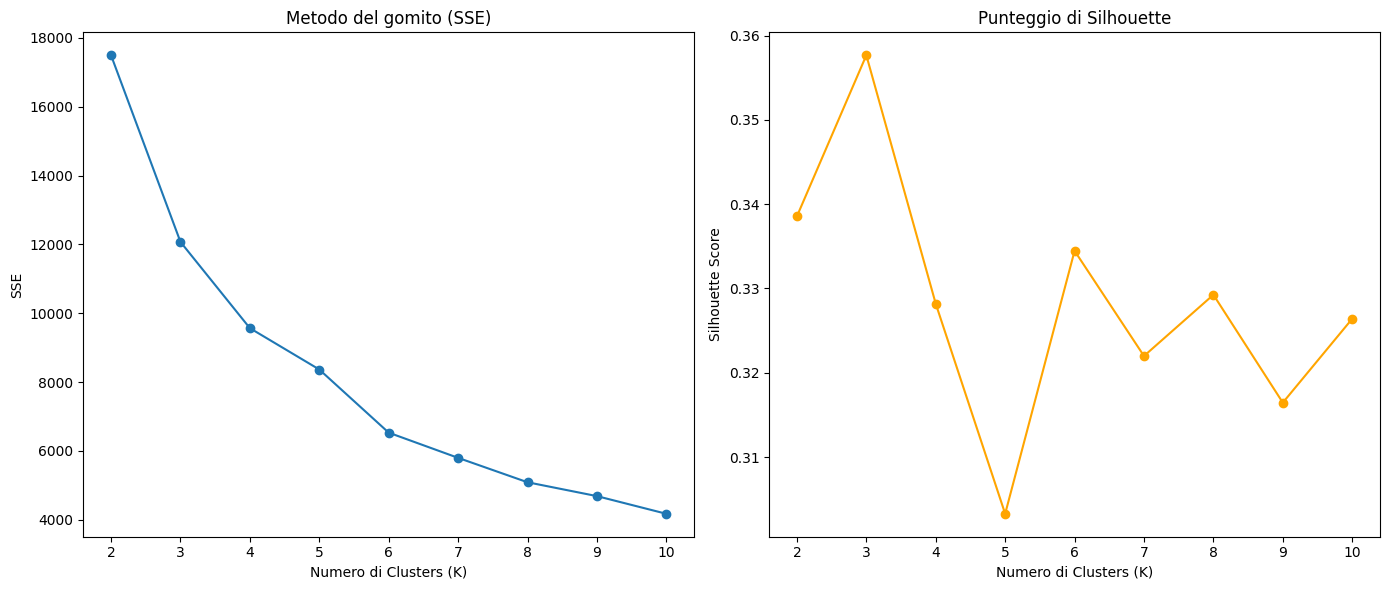

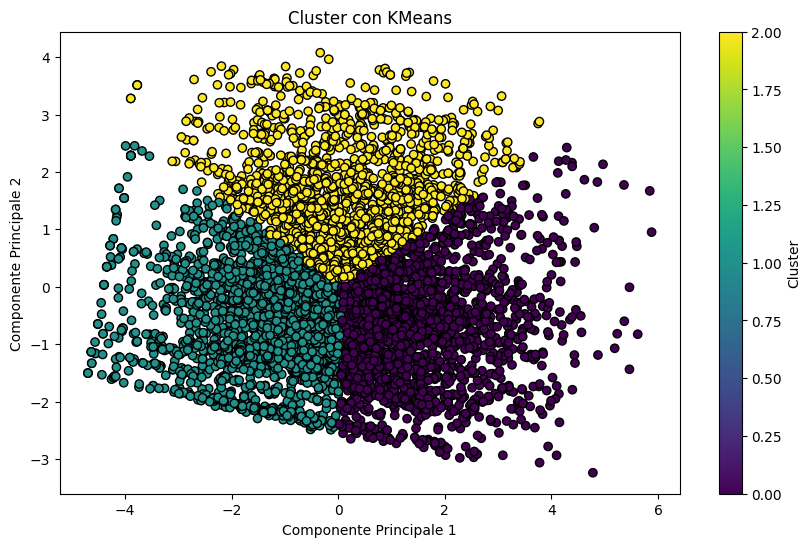

Cluster 0:
      gender   age             field  \
0          0  24.0               law   
2          0  24.0               law   
5          0  24.0               law   
8          0  24.0               law   
25         0  23.0               Law   
...      ...   ...               ...   
7266       1  25.0  Climate Dynamics   
7275       1  25.0  Climate Dynamics   
7276       1  25.0  Climate Dynamics   
7277       1  25.0  Climate Dynamics   
7285       1  25.0  Climate Dynamics   

                                                 career      attr      sinc  \
0                                                   law -0.664763 -0.186087   
2                                                   law -0.664763  0.445534   
5                                                   law  0.933251 -0.186087   
8                                                   law  0.400580 -0.817707   
25                                   lawyer/policy work -0.664763  1.708775   
...                               

In [24]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/normalized_data_no_outliers.csv')
data = data.dropna()  # Rimozione delle righe con valori NaN

# Colonne più influenti all'interno del set di dati
columns_to_standardize = ['art', 'reading', 'attr', 'museums', 'sinc', 'fun', 'amb', 'shar']

# Standardizzazione dei dati
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_to_standardize])

# Test del numero di componenti PCA
n_components_pca =2  
pca = PCA(n_components=n_components_pca)
pca_data = pca.fit_transform(scaled_data)

# Inizializzazione delle metriche per la valutazione del clustering
sse = []
silhouette_scores = []
k_range = range(2, 11)

# Test dei k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, labels))

print("Silhouette Scores:",silhouette_scores)

# Plot delle metriche
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(k_range, sse, marker='o')
axs[0].set_title('Metodo del gomito (SSE)')
axs[0].set_xlabel('Numero di Clusters (K)')
axs[0].set_ylabel('SSE')

axs[1].plot(k_range, silhouette_scores, marker='o', color='orange')
axs[1].set_title('Punteggio di Silhouette')
axs[1].set_xlabel('Numero di Clusters (K)')
axs[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Applicazione del K-Means con best k 
kmeans_model = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans_model.fit_predict(pca_data)

# Visualizzazione dei cluster
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title(f'Cluster con KMeans')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.colorbar(label='Cluster')
plt.show()

# Stampa del contenuto dei cluster
for cluster in range(3):
    print(f"Cluster {cluster}:")
    print(data[data['cluster'] == cluster])
    print("\n")


<section id="sistema">
    <h1>4. Sistema di raccomandazione</h1>
</section>
In questa sezione vedremo la creazione del sistema di raccomandazione, andando a definire i metodi necessari affinchè il sistema effettui delle raccomandazioni nel migliore dei modi.

In [3]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Funzione di raccomandazione
def recommend_similar_users(data_train, data_test, columns_to_standardize, top_n, similarity_threshold=0.5):
    # Standardizzazione dei dati di training
    scaler = StandardScaler()
    scaler.fit(data_train[columns_to_standardize])  # Fit su training set

    # Seleziona un solo utente dal test set
    data_test_sample = data_test.sample(1)

    # Calcolo della similarità tra l'utente selezionato e gli utenti del training set
    standardized_data_test = scaler.transform(data_test_sample[columns_to_standardize])
    standardized_data_train = scaler.transform(data_train[columns_to_standardize])

    similarity_matrix = cosine_similarity(standardized_data_test, standardized_data_train)

    similarity_df = pd.DataFrame(similarity_matrix, index=data_test_sample.index, columns=data_train.index)

    test_user = similarity_df.index[0]
    
    # Filtra utenti con una similarità superiore alla soglia
    similar_users = similarity_df.loc[test_user][similarity_df.loc[test_user] > similarity_threshold].sort_values(ascending=False).head(top_n)

    print(f"\nRaccomandazioni per l'utente {test_user} con soglia di similarità > {similarity_threshold}:")
    print(f"Utenti raccomandati: {similar_users.index.tolist()}")
    
    return similar_users.index.tolist(), similarity_df


data = pd.read_csv("datasets/normalized_data_no_outliers.csv")

# Controllo dei NaN e gestione
data.fillna(data.median(numeric_only=True), inplace=True)

# Colonne da standardizzare (più rilevanti)
columns_to_standardize = ['art', 'reading', 'attr', 'museums', 'sinc', 'fun', 'amb', 'shar']

# Suddividiamo il dataset in training e test set
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

""" # Lista degli utenti rilevanti
relevant_users = [338, 5123, 712, 1312, 4211, 4220, 6279, 829, 937, 1140, 567, 345, 234, 876, 4321, 6543, 765, 9801]
 """
# Raccomandazioni con soglia di similarità ridotta
recommended_users, similarity_matrix = recommend_similar_users(data_train, data_test, columns_to_standardize, top_n=50, similarity_threshold=0.5)


Raccomandazioni per l'utente 2095 con soglia di similarità > 0.5:
Utenti raccomandati: [2087, 6895, 2201, 2081, 4382, 6900, 598, 4996, 6885, 5956, 593, 2090, 2093, 2774, 6011, 4779, 442, 6884, 951, 3462, 2086, 3447, 4655, 5814, 436, 605, 1798, 7086, 6332, 4977, 1282, 5912, 1367, 5591, 6902, 6173, 5816, 2761, 2461, 5812, 4184, 5818, 6175, 6904, 4992, 2460, 952, 6184, 607, 7080]


### Codifica delle colonne categoriche

In [89]:
from sklearn.preprocessing import LabelEncoder

# Conversine delle colonne categoriche in numeriche
label_encoder = LabelEncoder()

# Codifica di 'field' e 'career'
data['field'] = label_encoder.fit_transform(data['field'])
data['career'] = label_encoder.fit_transform(data['career'])


### Utenti rilevanti
Funzione per trovare gli utenti più rilevanti

In [110]:
def find_relevant_users(data_train, test_user_features, columns_to_compare, similarity_threshold=0.7):
    # Standardizzazione dei dati di training
    scaler = StandardScaler()
    scaler.fit(data_train[columns_to_compare])
    
    standardized_train_data = scaler.transform(data_train[columns_to_compare])
    standardized_test_user = scaler.transform([test_user_features])
    
    # Calcolo della similarità tra l'utente di test e tutti gli utenti di training
    similarity_matrix = cosine_similarity(standardized_test_user, standardized_train_data)
    
    # Filtraggio degli utenti con similarità sopra la soglia
    similar_users_indices = np.where(similarity_matrix[0] > similarity_threshold)[0]
    
    # Id degli utenti più rilevandi
    relevant_users = data_train.iloc[similar_users_indices].index.tolist()
    
    return relevant_users

test_user_features = data_test.iloc[0][columns_to_standardize].values  # Caratteristiche del primo utente nel test set
relevant_users = find_relevant_users(data_train, test_user_features, columns_to_standardize, similarity_threshold=0.7)
print(f"Utenti rilevanti trovati: {relevant_users}")


Utenti rilevanti dinamicamente trovati: [2199, 4489, 2197, 5474, 5478, 5466, 2201, 4482, 4486, 5471, 4481, 5477, 5464, 1798, 5468, 4492, 4495, 2200, 4496, 4488, 4493]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Sistema di raccomandazione v2

In [162]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import pandas as pd

# Funzione di raccomandazione migliorata con soglia dinamica
def recommend_similar_users(data_train, data_test, test_user_id, columns_to_standardize, top_n=100, similarity_threshold=0.2):
    # Standardizzazione dei dati di training con MinMaxScaler
    scaler = MinMaxScaler()
    data_train_scaled = scaler.fit_transform(data_train[columns_to_standardize])

    # Riduzione dimensionalità con SVD per migliorare il calcolo della similarità
    svd = TruncatedSVD(n_components=50, random_state=42)
    data_train_svd = svd.fit_transform(data_train_scaled)

    # Seleziona uno specifico utente dal test set usando l'ID
    data_test_sample = data_test[data_test['ID'] == test_user_id]
    data_test_scaled = scaler.transform(data_test_sample[columns_to_standardize])
    data_test_svd = svd.transform(data_test_scaled)

    # Calcola similarità tra l'utente selezionato e gli utenti del training set
    similarity_matrix = cosine_similarity(data_test_svd, data_train_svd)

    similarity_df = pd.DataFrame(similarity_matrix, index=data_test_sample['ID'], columns=data_train['ID'])

    test_user = similarity_df.index[0]
    
    # Filtra gli utenti con una similarità sopra una certa soglia
    similar_users = similarity_df.loc[test_user][similarity_df.loc[test_user] > similarity_threshold].sort_values(ascending=False).head(top_n)

    print(f"\nRaccomandazioni per l'utente {test_user} con soglia di similarità > {similarity_threshold}:")
    for user in similar_users.index[:top_n]:
        similarity = similar_users[user]
        print(f"Utente: {user}, Similarità: {similarity:.4f}")

    return similar_users, similarity_df

# Funzione per calcolare precision e recall
def precision_recall(recommended_users, relevant_users, relevant_user_ids):
    recommended_users_set = set(recommended_users)
    relevant_users_set = set(relevant_user_ids)
    
    true_positives = recommended_users_set.intersection(relevant_users_set)

    print(f"True Positives (utenti in comune): {true_positives}")

    # Precision: quanti degli utenti raccomandati sono rilevanti
    if len(recommended_users_set) > 0:
        precision = len(true_positives) / len(recommended_users_set)
    else:
        precision = 0.0
    
    # Recall: quanti degli utenti rilevanti sono stati raccomandati
    if len(relevant_users_set) > 0:
        recall = len(true_positives) / len(relevant_users_set)
    else:
        recall = 0.0

    print(f"User rilevanti nel test set:{relevant_users_set}")
    print(f"user raccomandati:{recommended_users_set}")
    
    return precision, recall

# Caricamento del dataset
data = pd.read_csv("datasets/normalized_data_no_outliers.csv")

# Aggiungi una colonna ID al dataset (assumendo che ogni riga rappresenti un utente unico)
data['ID'] = range(1, len(data) + 1)

# Gestione dei valori mancanti: sostituiamo i NaN con la mediana delle colonne numeriche
data.fillna(data.median(numeric_only=True), inplace=True)

# Converti le colonne categoriche in numeriche usando OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['field', 'career']
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[categorical_columns])

# Aggiungi le colonne codificate al dataset originale e rimuovi le colonne originali
data_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
data = pd.concat([data.drop(columns=categorical_columns), data_encoded], axis=1)

# Seleziona le colonne da standardizzare
columns_to_standardize = ['gender', 'age', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'sports', 
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 
       'yoga'] + list(data_encoded.columns)

# Suddividiamo il dataset in training e test set
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

# Scegli uno specifico ID utente dal test set
specific_user_id = 1110 

# Verifica se l'utente specifico esiste nel test set
if specific_user_id in data_test['ID'].values:
    # Raccomanda utenti simili per l'utente specifico
    recommended_users, similarity_matrix = recommend_similar_users(data_train, data_test, specific_user_id, columns_to_standardize, top_n=100, similarity_threshold=0.2)

    # Definisci utenti rilevanti per precision e recall
    relevant_users = [2199, 4489, 2197, 5474, 5478, 5466, 2201, 4482, 4486, 5471, 4481, 5477, 5464, 1798, 5468, 4492, 4495, 2200, 4496, 4488, 4493]

    # Verifica se gli utenti rilevanti sono presenti nel dataset
    relevant_in_dataset = set(relevant_users).intersection(data_test['ID'])

    if relevant_in_dataset:
        precision, recall = precision_recall(recommended_users.index, relevant_in_dataset, relevant_users)
        print(f"\nPrecision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
    else:
        print("Nessun utente rilevante trovato nel dataset.")
else:
    print(f"Utente con ID {specific_user_id} non trovato nel test set.")



Raccomandazioni per l'utente 1110 con soglia di similarità > 0.2:
Utente: 1107, Similarità: 0.9906
Utente: 1113, Similarità: 0.9884
Utente: 1103, Similarità: 0.9876
Utente: 1102, Similarità: 0.9856
Utente: 1105, Similarità: 0.9854
Utente: 1101, Similarità: 0.9848
Utente: 1106, Similarità: 0.9841
Utente: 1112, Similarità: 0.9818
Utente: 1108, Similarità: 0.9811
Utente: 1111, Similarità: 0.9809
Utente: 1115, Similarità: 0.9792
Utente: 1114, Similarità: 0.9738
Utente: 781, Similarità: 0.9704
Utente: 785, Similarità: 0.9694
Utente: 800, Similarità: 0.9648
Utente: 791, Similarità: 0.9629
Utente: 796, Similarità: 0.9624
Utente: 795, Similarità: 0.9612
Utente: 782, Similarità: 0.9597
Utente: 786, Similarità: 0.9593
Utente: 784, Similarità: 0.9590
Utente: 5865, Similarità: 0.9588
Utente: 788, Similarità: 0.9588
Utente: 789, Similarità: 0.9585
Utente: 794, Similarità: 0.9584
Utente: 792, Similarità: 0.9582
Utente: 3974, Similarità: 0.9581
Utente: 3971, Similarità: 0.9580
Utente: 798, Similarit

# Raccomandazione con KNN 

In questa sezione si è pensato di effettuare una classificazione di utenti, per poi effettuare la raccomandazione, vengono plottati dei dati che rappresentano gli user simili ad uno user preso in input in particolare ogni user avrà un grado di similarità, sono state anche stampate le caratteristiche degli utenti:

- Utenti Raccomandati:

Questi sono gli utenti che il modello di raccomandazione ha suggerito come i più simili all'utente di riferimento. La similarità è calcolata utilizzando la similarità coseno basata su un insieme di caratteristiche standardizzate.

- Utenti Rilevanti:

Questi sono utenti definiti manualmente o derivati da un set di utenti considerati importanti o interessanti per un particolare criterio. Selezionati sulla base di un'osservazione specifica, obiettivo aziendale o altre ragioni esterne al modello.


Raccomandazioni per l'utente 4597:
Utente: 4602, Similarità: 0.9349
Utente: 4603, Similarità: 0.9166
Utente: 4590, Similarità: 0.9107
Utente: 4589, Similarità: 0.9046
Utente: 4599, Similarità: 0.8950
Utente: 4591, Similarità: 0.8536
Utente: 4595, Similarità: 0.8287
Utente: 4598, Similarità: 0.8180
Utente: 4592, Similarità: 0.7971
Utente: 4587, Similarità: 0.7494
Utente: 4593, Similarità: 0.7478
Utente: 4327, Similarità: 0.6936
Utente: 4298, Similarità: 0.6814
Utente: 4300, Similarità: 0.6714
Utente: 4293, Similarità: 0.6707
Utente: 4294, Similarità: 0.6684
Utente: 5764, Similarità: 0.6647
Utente: 4321, Similarità: 0.6542
Utente: 4296, Similarità: 0.6499
Utente: 1914, Similarità: 0.6495
Utente: 1909, Similarità: 0.6491
Utente: 4292, Similarità: 0.6484
Utente: 1905, Similarità: 0.6466
Utente: 1913, Similarità: 0.6396
Utente: 4299, Similarità: 0.6381
Utente: 5181, Similarità: 0.6327
Utente: 1908, Similarità: 0.6309
Utente: 3562, Similarità: 0.6294
Utente: 2703, Similarità: 0.6204
Utente:

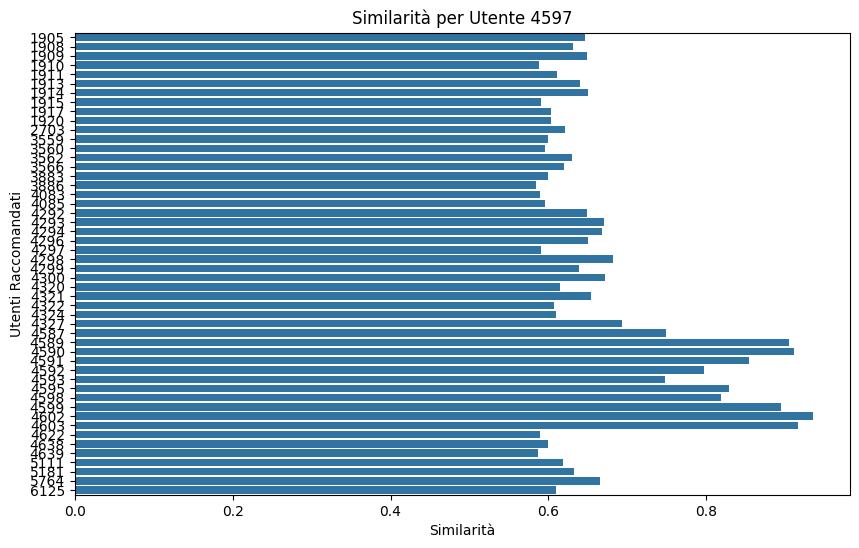

Utenti rilevanti trovati nel dataset: {1312, 5123, 6279, 712, 338, 4211, 4220}
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
  

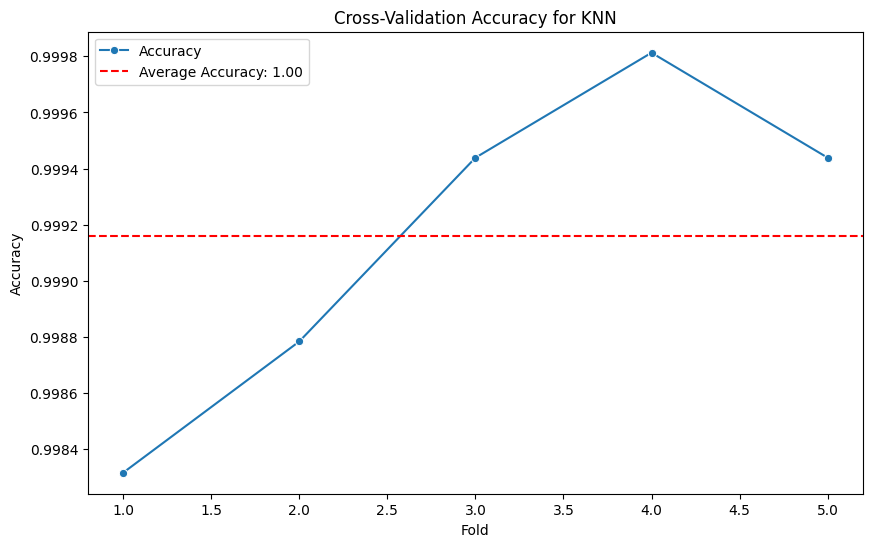


Caratteristiche degli utenti raccomandati:
      gender   age  field  career      attr      sinc     intel       fun  \
4602       0  31.0      7     156 -0.664763 -1.449328 -1.014730 -1.363014   
4603       0  31.0      7     156  0.400580 -0.186087 -0.322463  0.812392   
4590       0  31.0      7     156 -0.664763  0.445534 -1.014730 -0.275311   
4589       0  31.0      7     156 -1.197434  0.445534  0.369804 -0.819162   
4599       0  31.0      7     156 -1.197434 -0.817707 -0.322463 -1.363014   
4591       0  31.0      7     156  0.400580  0.445534 -0.322463  1.356244   
4595       0  31.0      7     156  0.933251  0.445534  0.369804  0.812392   
4598       0  31.0      7     156  0.933251  0.445534 -0.322463  0.268541   
4592       0  31.0      7     156 -0.132091  1.077155  1.062071  0.268541   
4587       0  31.0      7     156 -1.197434  1.077155  1.062071 -1.363014   
4593       0  31.0      7     156 -0.132091  1.077155  1.062071 -0.275311   
4327       0  30.0     71     20

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from imblearn.over_sampling import SMOTE  # SMOTE per bilanciare il dataset

# Caricamento del dataset
data = pd.read_csv("datasets/normalized_data_no_outliers.csv")

# Gestione dei valori mancanti: sostituiamo i NaN con la mediana delle colonne numeriche
data.fillna(data.median(numeric_only=True), inplace=True)

# Convertiamo le colonne categoriali (ad esempio 'field') in valori numerici con LabelEncoder
label_encoder = LabelEncoder()

# Individuiamo tutte le colonne categoriali (stringhe) e le convertiamo in numeri
for column in data.columns:
    if data[column].dtype == 'object':  # Controlla se la colonna è di tipo stringa (object)
        data[column] = label_encoder.fit_transform(data[column])

# Funzione per bilanciare il dataset
def balance_dataset(X, y):
    smote = SMOTE(random_state=42, k_neighbors=1)  # Imposta k_neighbors a 1
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

# Funzione di raccomandazione per un solo utente
def recommend_similar_users(data_train, data_test, columns_to_standardize, top_n=50):
    # Standardizzazione dei dati di training
    scaler = StandardScaler()
    scaler.fit(data_train[columns_to_standardize])

    # Seleziona un solo utente dal test set
    data_test_sample = data_test.sample(1)

    # Calcola similarità tra l'utente selezionato e gli utenti del training set
    standardized_data_test = scaler.transform(data_test_sample[columns_to_standardize])
    standardized_data_train = scaler.transform(data_train[columns_to_standardize])

    similarity_matrix = cosine_similarity(standardized_data_test, standardized_data_train)

    similarity_df = pd.DataFrame(similarity_matrix, index=data_test_sample.index, columns=data_train.index)

    test_user = similarity_df.index[0]
    similar_users = similarity_df.loc[test_user].sort_values(ascending=False).head(top_n)

    print(f"\nRaccomandazioni per l'utente {test_user}:")
    for user in similar_users.index[:top_n]:
        similarity = similar_users[user]
        print(f"Utente: {user}, Similarità: {similarity:.4f}")

    # Visualizza un plot della similarità
    plt.figure(figsize=(10, 6))
    sns.barplot(x=similar_users.values, y=similar_users.index, orient='h')
    plt.xlabel('Similarità')
    plt.ylabel('Utenti Raccomandati')
    plt.title(f'Similarità per Utente {test_user}')
    plt.show()

    return similar_users, similarity_df

# Funzione per verificare se gli utenti rilevanti sono nel dataset
def check_relevant_users_in_dataset(data, relevant_users):
    users_in_dataset = set(data.index)  # Assumendo che l'index del DataFrame siano gli ID utenti
    relevant_users_set = set(relevant_users)
    relevant_in_dataset = relevant_users_set.intersection(users_in_dataset)
    
    print(f"Utenti rilevanti trovati nel dataset: {relevant_in_dataset}")
    return relevant_in_dataset


# Funzione per la classificazione con KNN e validazione del modello
def knn_classification(data, target_column, test_size=0.2, k=5):
    # Dividi il dataset in training e test
    X = data.drop(columns=[target_column])  # Filtra solo colonne numeriche
    y = data[target_column]  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Bilanciamento del dataset
    X_train_balanced, y_train_balanced = balance_dataset(X_train, y_train)
    
    # Standardizzazione dei dati
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_balanced)
    X_test_scaled = scaler.transform(X_test)
    
    # Modello KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_balanced)
    
    # Predizione
    y_pred = knn.predict(X_test_scaled)
    
    # Valutazione
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
    
    # Report dettagliato
    print(classification_report(y_test, y_pred, zero_division=1))
    
    # Validazione con Cross-Validation
    cv = StratifiedKFold(n_splits=5)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train_balanced, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Average CV Accuracy: {cv_scores.mean():.2f}")

    # Plot dell'accuracy della cross-validation
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(1, len(cv_scores) + 1), y=cv_scores, marker='o', label='Accuracy')
    plt.axhline(np.mean(cv_scores), linestyle='--', color='red', label=f'Average Accuracy: {np.mean(cv_scores):.2f}')
    plt.title('Cross-Validation Accuracy for KNN')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return knn, accuracy, precision, recall

# Definisci la colonna target per il KNN (può essere la colonna di etichette creata dal clustering)
target_column = 'career'

# Suddividiamo il dataset in training e test set
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

# Esegui la raccomandazione, standardizzando solo le colonne numeriche e aumentando top_n
recommended_users, similarity_matrix = recommend_similar_users(data_train, data_test, data.select_dtypes(include=[np.number]).columns.tolist(), top_n=50)

# Definisci utenti rilevanti per precision e recall
relevant_users = [338, 5123, 712, 1312, 4211, 4220, 6279]

# Verifica se questi utenti sono effettivamente presenti nel dataset
relevant_in_dataset = check_relevant_users_in_dataset(data, relevant_users)


# Ora esegui la classificazione KNN con validazione
knn, accuracy, precision_knn, recall_knn = knn_classification(data, target_column)

# Visualizza gli utenti raccomandati e rilevanti per confrontare le loro caratteristiche
print("\nCaratteristiche degli utenti raccomandati:")
print(data.loc[list(recommended_users.index)])

print("\nCaratteristiche degli utenti rilevanti trovati nel dataset:")
print(data.loc[list(relevant_in_dataset)])


# Confronto con K-MEANS e KNN 

Silhouette Scores: [0.338562432395433, 0.3576704273256569, 0.3281885586378277, 0.30327176743575823, 0.3344671011108416, 0.32199210658652944, 0.32925690373935207, 0.3164570770638907, 0.32641195458676475]


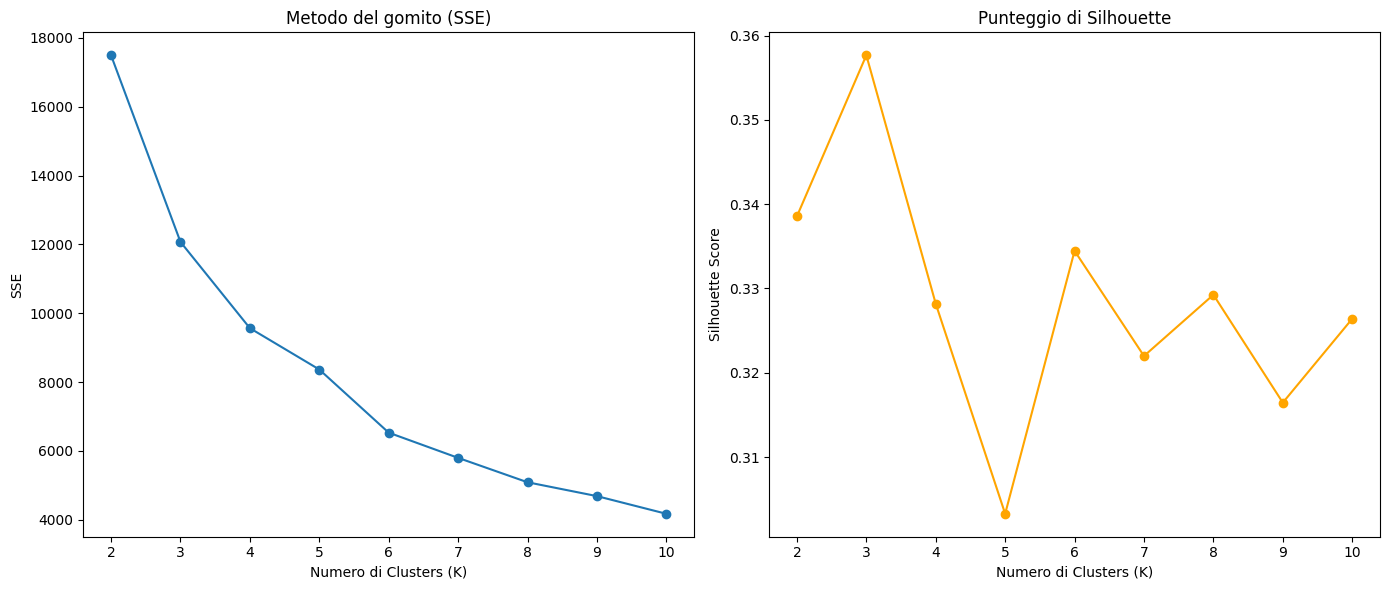

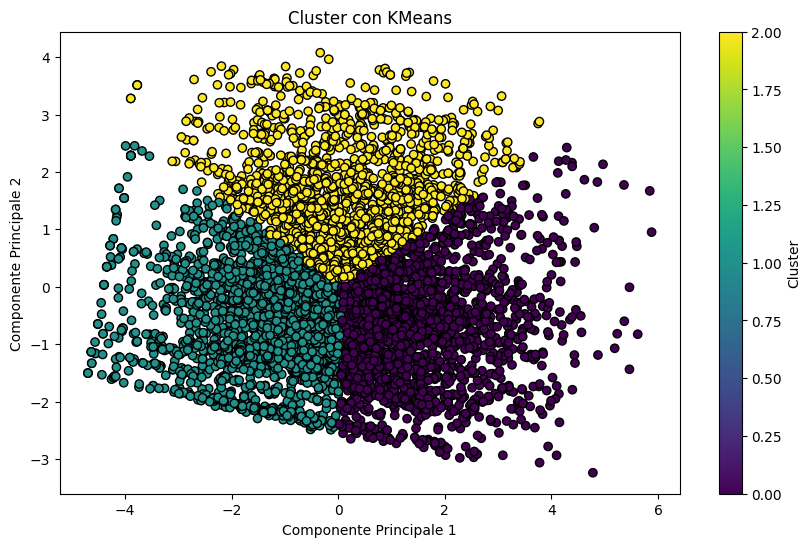

In [51]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Caricamento del dataset
data = pd.read_csv('datasets/normalized_data_no_outliers.csv')
data = data.dropna()  # Rimozione delle righe con valori NaN

# Colonne più influenti all'interno del set di dati
columns_to_standardize = ['art', 'reading', 'attr', 'museums', 'sinc', 'fun', 'amb', 'shar']

# Standardizzazione dei dati
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_to_standardize])

# Test del numero di componenti PCA
n_components_pca = 2  
pca = PCA(n_components=n_components_pca)
pca_data = pca.fit_transform(scaled_data)

# Inizializzazione delle metriche per la valutazione del clustering
sse = []
silhouette_scores = []
k_range = range(2, 11)

# Test dei k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, labels))

print("Silhouette Scores:", silhouette_scores)

# Plot delle metriche
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(k_range, sse, marker='o')
axs[0].set_title('Metodo del gomito (SSE)')
axs[0].set_xlabel('Numero di Clusters (K)')
axs[0].set_ylabel('SSE')

axs[1].plot(k_range, silhouette_scores, marker='o', color='orange')
axs[1].set_title('Punteggio di Silhouette')
axs[1].set_xlabel('Numero di Clusters (K)')
axs[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Applicazione del K-Means con il miglior numero di cluster
kmeans_model = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans_model.fit_predict(pca_data)

# Visualizzazione dei cluster
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title(f'Cluster con KMeans')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.colorbar(label='Cluster')
plt.show()


In [52]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Funzione di raccomandazione per un solo utente
def recommend_similar_users(data_train, data_test, columns_to_standardize, top_n):
    scaler = StandardScaler()
    scaler.fit(data_train[columns_to_standardize])  # Fit sui dati di training

    data_test_sample = data_test.sample(1)  # Seleziona un solo utente dal test set
    standardized_data_test = scaler.transform(data_test_sample[columns_to_standardize])
    standardized_data_train = scaler.transform(data_train[columns_to_standardize])

    similarity_matrix = cosine_similarity(standardized_data_test, standardized_data_train)
    similarity_df = pd.DataFrame(similarity_matrix, index=data_test_sample.index, columns=data_train.index)

    test_user = similarity_df.index[0]
    similar_users = similarity_df.loc[test_user].sort_values(ascending=False).head(top_n)

    print(f"\nRaccomandazioni per l'utente {test_user}:")
    for user in similar_users.index[:top_n]:
        similarity = similar_users[user]
        print(f"Utente: {user}, Similarità: {similarity:.4f}")

    return similar_users, similarity_df

# Caricamento del dataset
data = pd.read_csv('datasets/normalized_data_no_outliers.csv')
data = data.dropna()  # Rimozione delle righe con valori NaN

# Selezione delle colonne da standardizzare
columns_to_standardize = ['art', 'reading', 'attr', 'museums', 'sinc', 'fun', 'amb', 'shar']

# Suddivisione del dataset in training e test set
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

# Raccomandazione con KNN
recommended_users, similarity_matrix = recommend_similar_users(data_train, data_test, columns_to_standardize, top_n=15)

print("------------------------------- Data Test -------------------------------")
print(data_test)
print("------------------------------- Data Train -------------------------------")
print(data_train)
print("------------------------------- Utenti raccomandati -------------------------------")
print(recommended_users)



Raccomandazioni per l'utente 990:
Utente: 1000, Similarità: 0.9231
Utente: 985, Similarità: 0.9049
Utente: 993, Similarità: 0.8965
Utente: 5572, Similarità: 0.8397
Utente: 6798, Similarità: 0.8375
Utente: 996, Similarità: 0.8334
Utente: 6850, Similarità: 0.8158
Utente: 4191, Similarità: 0.8072
Utente: 2188, Similarità: 0.7944
Utente: 6849, Similarità: 0.7914
Utente: 408, Similarità: 0.7861
Utente: 2091, Similarità: 0.7855
Utente: 6186, Similarità: 0.7803
Utente: 3053, Similarità: 0.7782
Utente: 1826, Similarità: 0.7765
------------------------------- Data Test -------------------------------
      gender   age                                    field  \
876        1  22.0                                      MBA   
4035       0  28.0                         Speech Pathology   
1660       0  27.0                                  Finance   
1505       1  27.0                                 Business   
1469       1  25.0                                     Film   
...      ...   ...    

Per il numero di utenti troppo basso il sistema di raccomandazione non effettua delle predizioni adeguate, questo a causa di una presenza troppo piccola di utenti raccomandati.
Percio andiamo ad aumentare il numero di utenti 

# Ricorda la precision e recall


In [66]:
# Funzione per calcolare precision e recall con stampe di debug
def precision_recall(recommended_users, relevant_users):
    recommended_users_set = set(recommended_users)
    relevant_users_set = set(relevant_users)
    
    # Intersezione tra utenti raccomandati e rilevanti
    true_positives = recommended_users_set.intersection(relevant_users_set)

    print(f"Utenti raccomandati: {recommended_users_set}")
    print(f"Utenti rilevanti: {relevant_users_set}")
    print(f"True Positives (utenti in comune): {true_positives}")

    # Precision: quanti utenti raccomandati sono rilevanti
    if len(recommended_users_set) > 0:
        precision = len(true_positives) / len(recommended_users_set)
    else:
        precision = 0.0
    
    # Recall: quanti utenti rilevanti sono stati raccomandati
    if len(relevant_users_set) > 0:
        recall = len(true_positives) / len(relevant_users_set)
    else:
        recall = 0.0
    
    return precision, recall

# Definisci utenti rilevanti per precision e recall
relevant_users = [338, 5123, 712, 1312, 4211, 4220, 6279, 829, 937, 1140]  # Lista estesa di utenti rilevanti

# Precision e Recall per il sistema di raccomandazione
precision, recall = precision_recall(recommended_users.index, relevant_users)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Utenti raccomandati: {4115, 4116, 7189, 7190, 7191, 4120, 7193, 4121, 2596, 5699, 5701, 5705, 2131, 6228, 2138, 2139, 610, 3687, 2152, 2157, 5234, 5235, 4727, 1655, 1656, 3712, 4744, 4747, 4237, 4758, 2206, 3754, 3755, 6829, 3759, 3773, 3774, 3777, 1217, 1218, 3780, 3779, 3787, 3792, 3793, 1236, 3798, 3800, 3804, 3806, 4831, 3809, 3327, 4372, 6933, 4374, 6436, 6438, 2345, 2347, 2349, 2352, 2878, 831, 837, 6982, 326, 329, 331, 337, 340, 2393, 2401, 2403, 369, 1397, 2951, 2953, 2954, 394, 6027, 2957, 2958, 6029, 3472, 401, 2962, 400, 402, 3477, 3478, 2966, 2968, 5034, 5037, 5054, 5055, 1991, 970, 497}
Utenti rilevanti: {1312, 5123, 6279, 712, 937, 338, 4211, 1140, 4220, 829}
True Positives (utenti in comune): set()
Precision: 0.00
Recall: 0.00


In [71]:
# Raccomandazione con soglia di similarità ridotta e più utenti raccomandati
recommended_users, similarity_df = recommend_similar_users(
    data_train, data_test, 
    columns_to_standardize, 
    top_n=100,  # Aumentato a 100 utenti raccomandati
    similarity_threshold=0.5  # Ridotto a 0.5
)

# Calcolo di precisione e recall con la lista estesa di utenti rilevanti
precision, recall = precision_recall(recommended_users.index, relevant_users)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



Raccomandazioni per l'utente 2908 con soglia di similarità > 0.5:
Utente: 1607, Similarità: 1.0000
Utente: 5551, Similarità: 0.9320
Utente: 5562, Similarità: 0.9318
Utente: 63, Similarità: 0.9229
Utente: 1909, Similarità: 0.8873
Utente: 214, Similarità: 0.8836
Utente: 5563, Similarità: 0.8781
Utente: 3627, Similarità: 0.8731
Utente: 4620, Similarità: 0.8684
Utente: 2567, Similarità: 0.8674
Utente: 7117, Similarità: 0.8668
Utente: 1831, Similarità: 0.8626
Utente: 3056, Similarità: 0.8606
Utente: 2696, Similarità: 0.8505
Utente: 3634, Similarità: 0.8505
Utente: 2894, Similarità: 0.8479
Utente: 5567, Similarità: 0.8461
Utente: 3630, Similarità: 0.8446
Utente: 7114, Similarità: 0.8441
Utente: 1710, Similarità: 0.8422
Utente: 3189, Similarità: 0.8206
Utente: 7269, Similarità: 0.8197
Utente: 2295, Similarità: 0.8129
Utente: 5565, Similarità: 0.8102
Utente: 7103, Similarità: 0.8095
Utente: 59, Similarità: 0.8065
Utente: 7273, Similarità: 0.8041
Utente: 6650, Similarità: 0.8027
Utente: 4952, 